# The Glosten-Milgrom Model

### Setup

- The terminal value of security $V$ is either high ($V_h$) or low ($V_l$)
    - The dealer assigns probabilities $\theta_{t}$ and $(1-\theta_{t})$ to the occurence of $V_H$ or $V_L$ at time $t$
    - Thus, the dealer's estimate of $V$ after the $t^{th}$ order is $\mu_t = \theta_t V_H + (1 - \theta_t) V_L$
- At each period t,
    - A trader arrives to trade 1 lot
        - The trader is informed (knows the terminal value of $V$) with probability $\pi$
        - The trader is uninformed (buys/sells with probability 1/2) with probability $1 - \pi$
    - Dealer quotes ask price $a_t$ and bid price $b_t$
    - Trade occurs with a dealer at quoted prices


### Determining bid and ask quotes


Define the following events
- $I$ is the event that a trader is informed
- $U$ is the event that a trader is uninformed
- $B$ is the event that the order is a buy
- $S$ is the event that the order is a sell

Dealer's expected profit from transactions (buy orders) at the ask price $a_t$ 
 
\begin{equation}
	\begin{split}
        E[\text{Profit (buy)}] &= E[\text{Profit (buy)} | I] \cdot P(I) + E[\text{Profit (buy)} | U] \cdot P(U) \\
        &= [E[\text{Profit (buy)} | I, V_H] \cdot P(V_H) + E[\text{Profit (buy)} | I, V_L] \cdot P(V_L)]] \cdot P(I) + E[\text{Profit (buy)} | U] \cdot P(U) \\
        &= (a_t - V_H) \cdot \theta_{t-1} \pi_t + [E[\text{Profit (buy)} | U, B] P(U,B) + [\text{Profit (buy)} | U, S] P(U,S)] \cdot P(U) \\
        &= (a_t - V_H) \cdot \theta_{t-1} \pi_t + [E[\text{Profit (buy)} | U, B, V_H] P(V_H) + E[\text{Profit (buy)} | U, B, V_L] P(V_L)] \cdot P(U,B) P(U) \\
        &= (a_t - V_H) \cdot \theta_{t-1} \pi_t + [(a_t - V_H) \theta_{t-1} + (a_t - V_L) (1 - \theta_{t-1})] \cdot \frac{1}{2} (1 - \pi) \\
        &= \underbrace{\pi_t \theta_{t-1} \cdot (a_t - _H)}_{\text{expected profit from informed trader}} + \underbrace{(1 - \pi_t) \frac{1}{2} \cdot ( \theta_{t-1} (a_t - V_H) + (1 - \theta_{t-1}) (a_t - V_L))}_{\text{expected profit from uninformed trader}} \\
        &= \pi_t \theta_{t-1} (a_t - V_H) + (1 - \pi_t) \frac{1}{2} (a_t - (V_H \theta_{t-1} + V_L (1 - \theta_{t-1}))) \\
        &= \pi_t \theta_{t-1} (a_t - V_H) + (1 - \pi_t) \frac{1}{2} (a_t - u_{t-1})
	\end{split}
\end{equation}

In a competitive market, $a_t$ will be such that the expected profits are zero. So, solving for $a_t$,
\begin{equation}
	\begin{split}
        0 &= \pi_t \theta_{t-1} (a_t - V_H) + (1 - \pi_t) \frac{1}{2} (a_t - u_{t-1}) \\
        \Rightarrow a_t &= \frac{\pi \theta_{t-1} V_H + \frac{1}{2}\mu_{t-1} - \frac{1}{2} \pi \mu_{t-1}}{\pi \theta + (1 - \pi)\frac{1}{2}} \\
        a_t &= \mu_{t-1} + \underbrace{\frac{\pi \theta_{t-1}}{\pi \theta + (1 - \pi)\frac{1}{2}}(V_H - \mu_{t-1})}_{s_t^a}
	\end{split}
\end{equation}

Similarly, the competitive bid price is
$$ b_t = \mu_{t-1} - \underbrace{\frac{\pi \theta_{t-1}(1 - \theta_{t-1})}{\pi (1 - \theta_{t-1}) + (1 - \pi)\frac{1}{2}}(V_H - V_L)}_{s_t^b}$$

Thus, we can write the bid-ask spread as
\begin{equation}
	\begin{split}
        S &= a_t - b_t \\ 
        &= (\mu_{t-1} + s_t^a) - (\mu_{t-1} - s_t^b) \\
        &= \underbrace{s_t^a + s_t^b}_{\text{adverse selection costs}}
	\end{split}
\end{equation}


### Revising quotes
We can calculate the probability the market maker assigns to the event that $V = V_H$ after observing a trade. If a buy order arrives, then

\begin{equation}
	\begin{split}
        P(V_H|\text{buy}) &= \frac{P(\text{buy} | V_H) P(V_H)}{P(\text{buy})} \\
        &= \frac{\big( P(\text{buy} | V_H, I)P(I) + (P(\text{buy} | V_H, U)P(U) \big) P(V_H)}{P(\text{buy}, I) + P(\text{buy}, U)} \\
        &= \frac{ \theta_{t-1}(\pi + \frac{1}{2}(1 - \pi))}{\pi \theta_{t-1} + \frac{1}{2}(1-\pi)} \\
        &= \theta_{t-1} + \frac{ \theta_{t-1}(1 - \theta_{t-1}) \pi }{\pi \theta_{t-1} + \frac{1}{2}(1-\pi)} \\
	\end{split}
\end{equation}

Similar calculations yield

\begin{equation}
	P(V_H|\text{sell}) = \frac{ \theta_{t-1}(1 - \pi)\frac{1}{2}}{\pi (1 - \theta_{t-1}) + (1 - \pi)\frac{1}{2}}
\end{equation}


### Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [2]:
# change default plotting
mpl.style.use('seaborn-whitegrid')
mpl.rcParams['axes.grid.axis'] = 'both'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['savefig.dpi'] = 150
mpl.rcParams['figure.figsize'] = [7, 5]
# mpl.rcParams.keys()

### Simulation

In [3]:
def glosten_milgrom(v_h, v_l, v, pi, theta_init, seed=1, sim_size=20):
    """Runs simulation of Glosten-Milgrom Model with given parameters.
    
    Args:
        v_h: high value of security
        v_l: low value of security
        v: true value of security (either v_h or v_l)
        pi: probability of a trader being informed
        theta_init: the initial estimate that the true value is v_h
        seed: used to set the random number generator seed
        sim_size: number of orders to s
    
    Returns:
        None - displays relevant results from the simulation
    """
    
    assert (v == v_h) or (v == v_l), 'Terminal value must be v_h or v_l'
    
    # get probability a trade is a buy (conditional on v) using Bayes' Theorem
    if v == v_h:
        p_buy = pi + (1 - pi) * 0.5
    elif v == v_l:
        p_buy = (1 - pi) * 0.5
     
    # create order flow simulation
    np.random.seed(seed)
    order_flow = np.random.choice([-1, 1], size=sim_size, p=[1-p_buy, p_buy])
    
    # initialalize parameters and ask/bid prices before observing any information
    mu_prev = theta_init * v_h + (1 - theta_init) * v_l
    theta_prev = theta_init
    thetas = [theta_prev]
    asks = [mu_prev + ((pi * theta_prev) / (pi * theta_prev + (1 - pi)*0.5)) * (v_h - mu_prev)]
    bids = [mu_prev - ((pi * theta_prev * (1 - theta_prev)) / (pi * (1 - theta_prev) + (1 - pi)*0.5)) * (v_h - v_l)]

    # update ask/bid and probability that v=v_h after observing each trade
    for order in order_flow:
        # update posterior probability of value of security after observing trade
        if order == 1:
            theta_prev = (((1 + pi)*0.5) / (pi * theta_prev + (1 - pi) * 0.5)) * theta_prev
        elif order == -1:
            theta_prev = (((1 - pi)*0.5) / (pi * (1 - theta_prev) + (1 - pi) * 0.5)) * theta_prev
        thetas.append(theta_prev)

        # update expected value of security and ask/bid prices based on observed trade
        mu_prev = v_h * theta_prev + v_l * (1 - theta_prev)
        asks.append(mu_prev + ((pi * theta_prev) / (pi * theta_prev + (1 - pi)*0.5)) * (v_h - mu_prev))
        bids.append(mu_prev - ((pi * theta_prev * (1 - theta_prev)) / (pi * (1 - theta_prev) + (1 - pi)*0.5)) * (v_h - v_l))


    # plotting    
    fig, axs = plt.subplots(1, 3, figsize=(16, 4))
    axs[0].plot(order_flow, 'o-')
    axs[0].set_title('Order Flow')
    
    axs[1].plot(thetas, 'o-')
    axs[1].set_ylim([0, 1.1])
    axs[1].set_title('Posterior Probability of $V=V_H$')

    axs[2].plot(asks, 'o-', label='Ask')
    axs[2].plot(bids, 'o-', label='Bid')
    axs[2].legend()
    axs[2].set_title('Bid/Ask Prices')


        

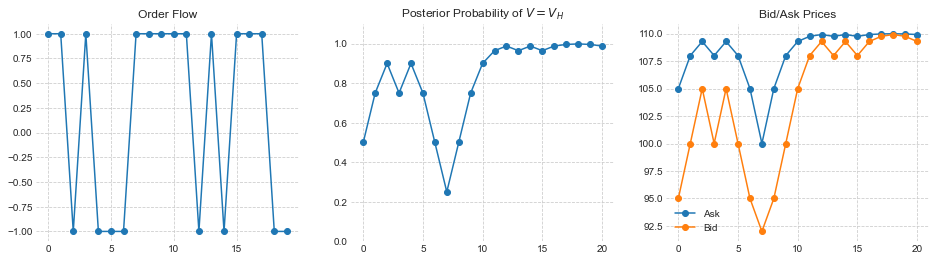

In [4]:
glosten_milgrom(110, 90, 110, 0.5, 0.5)

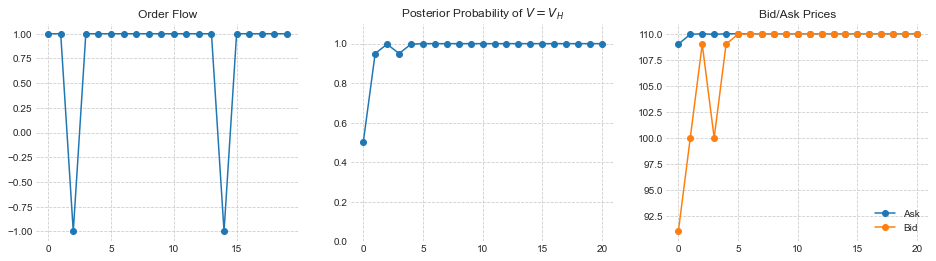

In [5]:
glosten_milgrom(110, 90, 110, 0.9, 0.5)

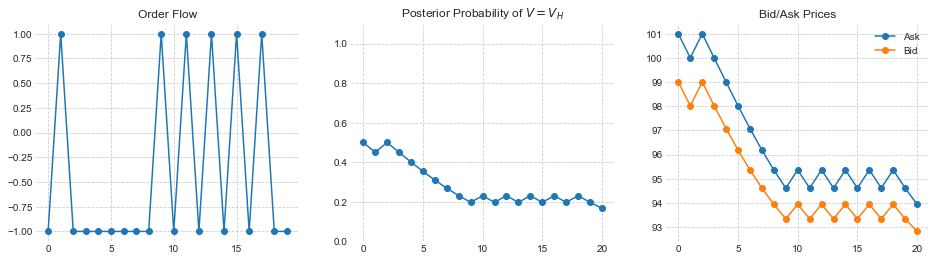

In [6]:
glosten_milgrom(110, 90, 110, 0.1, 0.5)

### Key Takeways
- The spread is increasing in informational asymmetry (adverse selection), uncertainty about the asset value, and volatility
- Noise trading keeps the market liquid and reduces the spread
- Informed trading increases the spread but speeds up price discovery - a tradeoff for regulation
